# Welcome
In this competition you'll notice there isn't a leaderboard, and you are not required to develop a predictive model. This isn't a traditional supervised Kaggle machine learning competition.

CareerVillage.org is a nonprofit that crowdsources career advice for underserved youth. Founded in 2011 in four classrooms in New York City, the platform has now served career advice from 25,000 volunteer professionals to over 3.5M online learners. The platform uses a Q&A style similar to StackOverflow or Quora to provide students with answers to any question about any career.

In this Data Science for Good challenge, CareerVillage.org, in partnership with Google.org, is inviting you to help recommend questions to appropriate volunteers. To support this challenge, CareerVillage.org has supplied five years of data.

### Problem Statement
The U.S. has almost 500 students for every guidance counselor. Underserved youth lack the network to find their career role models, making CareerVillage.org the only option for millions of young people in America and around the globe with nowhere else to turn.

To date, 25,000 volunteers have created profiles and opted in to receive emails when a career question is a good fit for them. This is where your skills come in. To help students get the advice they need, the team at CareerVillage.org needs to be able to send the right questions to the right volunteers. The notifications sent to volunteers seem to have the greatest impact on how many questions are answered.

<strong>Your objective: develop a method to recommend relevant questions to the professionals who are most likely to answer them.</strong>

### Criteria for Measuring Solutions
Performance: How well does the solution match professionals to the questions they would be motivated to answer? CareerVillage.org will not be able to live-test every submission, so a strong entry will clearly articulate why it will be effective at motivating answers.

Easy to implement: The CareerVillage.org team wants to put the winning submissions to work, quickly. A good entry will be well documented and easy to test in production.

Extensibility: In the future, CareerVillage.org aims to add more data features and to accommodate new objectives. Winning submissions should allow for this and other augmentations to be added in the future.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from glob import glob

In [4]:
import os
dir(os)

['DirEntry',
 'F_OK',
 'MutableMapping',
 'O_APPEND',
 'O_BINARY',
 'O_CREAT',
 'O_EXCL',
 'O_NOINHERIT',
 'O_RANDOM',
 'O_RDONLY',
 'O_RDWR',
 'O_SEQUENTIAL',
 'O_SHORT_LIVED',
 'O_TEMPORARY',
 'O_TEXT',
 'O_TRUNC',
 'O_WRONLY',
 'P_DETACH',
 'P_NOWAIT',
 'P_NOWAITO',
 'P_OVERLAY',
 'P_WAIT',
 'PathLike',
 'R_OK',
 'SEEK_CUR',
 'SEEK_END',
 'SEEK_SET',
 'TMP_MAX',
 'W_OK',
 'X_OK',
 '_Environ',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_execvpe',
 '_exists',
 '_exit',
 '_fspath',
 '_get_exports_list',
 '_putenv',
 '_unsetenv',
 '_wrap_close',
 'abc',
 'abort',
 'access',
 'altsep',
 'chdir',
 'chmod',
 'close',
 'closerange',
 'cpu_count',
 'curdir',
 'defpath',
 'device_encoding',
 'devnull',
 'dup',
 'dup2',
 'environ',
 'error',
 'execl',
 'execle',
 'execlp',
 'execlpe',
 'execv',
 'execve',
 'execvp',
 'execvpe',
 'extsep',
 'fdopen',
 'fsdecode',
 'fsencode',
 'fspath',
 'fstat',
 'fsync',
 'ft

In [15]:
path = os.getcwd()
path

'C:\\Users\\kvsis\\Desktop\\Learning\\Kaggle\\data-science-for-good-careervillage'

In [16]:
glob('*.csv')

['answers.csv',
 'answer_scores.csv',
 'comments.csv',
 'emails.csv',
 'groups.csv',
 'group_memberships.csv',
 'matches.csv',
 'professionals.csv',
 'questions.csv',
 'question_scores.csv',
 'school_memberships.csv',
 'students.csv',
 'tags.csv',
 'tag_questions.csv',
 'tag_users.csv']

In [20]:
answers = pd.read_csv('answers.csv')
answer_scores = pd.read_csv('answer_scores.csv')
comments = pd.read_csv('comments.csv')
emails = pd.read_csv('emails.csv')
groups = pd.read_csv('groups.csv')
group_memberships = pd.read_csv('group_memberships.csv')
matches = pd.read_csv('matches.csv')
professionals = pd.read_csv('professionals.csv')
questions = pd.read_csv('questions.csv')
question_scores = pd.read_csv('question_scores.csv')
school_memberships = pd.read_csv('school_memberships.csv')
students = pd.read_csv('students.csv')
tags = pd.read_csv('tags.csv')
tag_questions = pd.read_csv('tag_questions.csv')
tag_users = pd.read_csv('tag_users.csv')

In [31]:
meta = pd.DataFrame([answers.columns.values,
                   answer_scores.columns.values,
                   comments.columns.values,
                   emails.columns.values,
                   groups.columns.values,
                   group_memberships.columns.values,
                   matches.columns.values,
                   professionals.columns.values,
                   questions.columns.values,
                   question_scores.columns.values,
                   school_memberships.columns.values,
                   students.columns.values,
                   tags.columns.values,
                   tag_questions.columns.values,
                   tag_users.columns.values]).T
meta

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,answers_id,id,comments_id,emails_id,groups_id,group_memberships_group_id,matches_email_id,professionals_id,questions_id,id,school_memberships_school_id,students_id,tags_tag_id,tag_questions_tag_id,tag_users_tag_id
1,answers_author_id,score,comments_author_id,emails_recipient_id,groups_group_type,group_memberships_user_id,matches_question_id,professionals_location,questions_author_id,score,school_memberships_user_id,students_location,tags_tag_name,tag_questions_question_id,tag_users_user_id
2,answers_question_id,None,comments_parent_content_id,emails_date_sent,None,None,None,professionals_industry,questions_date_added,None,None,students_date_joined,None,None,None
3,answers_date_added,None,comments_date_added,emails_frequency_level,None,None,None,professionals_headline,questions_title,None,None,None,None,None,None
4,answers_body,None,comments_body,None,None,None,None,professionals_date_joined,questions_body,None,None,None,None,None,None


In [32]:
columns = ['answers',
           'answer_scores',
           'comments',
           'emails',
           'groups',
           'group_memberships',
           'matches',
           'professionals',
           'questions',
           'question_scores',
           'school_memberships',
           'students',
           'tags',
           'tag_questions',
           'tag_users']
meta.columns = columns

In [36]:
meta = meta.T
meta

,0,1,2,3,4
answers,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
answer_scores,id,score,None,None,None
comments,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body
emails,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level,None
groups,groups_id,groups_group_type,None,None,None
group_memberships,group_memberships_group_id,group_memberships_user_id,None,None,None
matches,matches_email_id,matches_question_id,None,None,None
professionals,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
questions,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
question_scores,id,score,None,None,None


## What quetions do we have from the data?

1. How many students and professionals participate on the platform?
2. Historical activity of both students and professionals on a monthly basis by year on the platform?
3. How many professionals have answered atleast 1 question and how many students have asked atleast 1 question?
4. How many groups can we form of professionals based on them answering questions?
5. How many students and professionals are part of a group?
6. Do students/professionals who are part of a group participate more/less?

#### Let's answer the above questions

##### How many students and professionals participate on the platform?

In [44]:
participants = pd.DataFrame([[len(students), len(professionals)]], columns=['Student Count', 'Professional Count'])
participants

,Student Count,Professional Count
0,30971,28152


##### Historical activity of both students and professionals on a monthly basis by year on the platform

In [45]:
# Let's begin with answering the question for Students
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 5 columns):
questions_id            23931 non-null object
questions_author_id     23931 non-null object
questions_date_added    23931 non-null object
questions_title         23931 non-null object
questions_body          23931 non-null object
dtypes: object(5)
memory usage: 934.9+ KB


In [48]:
questions.questions_id = questions.questions_id.astype('str')
questions.questions_author_id = questions.questions_author_id.astype('str')
questions.questions_date_added = pd.to_datetime(questions.questions_date_added)
questions.questions_title = questions.questions_title.astype('str')
questions.questions_body = questions.questions_body.astype('str')

In [49]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23931 entries, 0 to 23930
Data columns (total 5 columns):
questions_id            23931 non-null object
questions_author_id     23931 non-null object
questions_date_added    23931 non-null datetime64[ns, UTC]
questions_title         23931 non-null object
questions_body          23931 non-null object
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 934.9+ KB


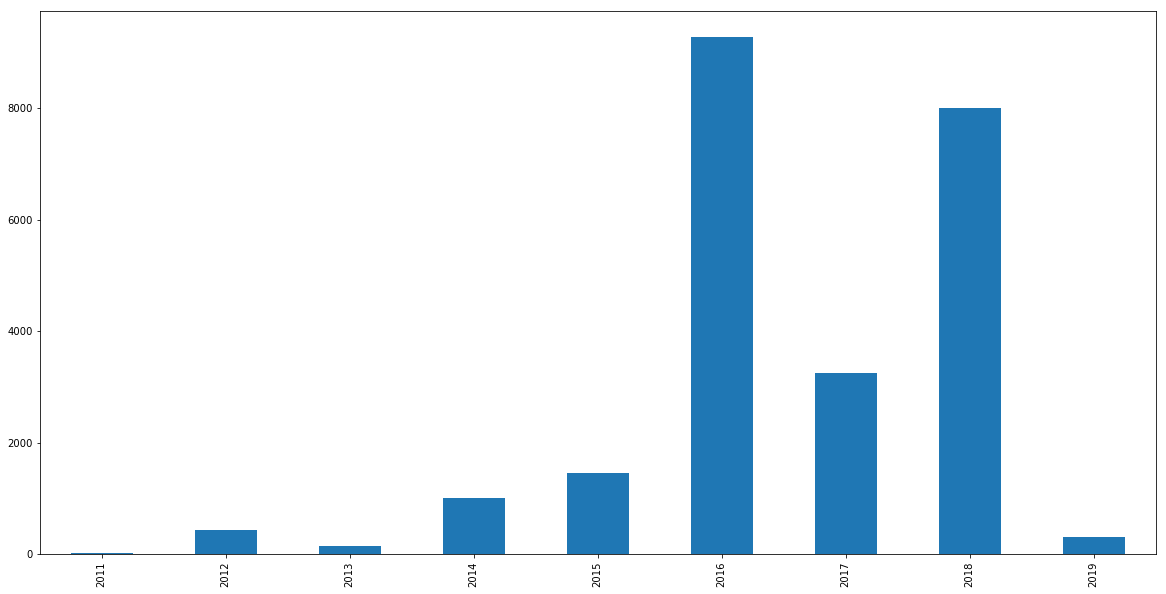

In [138]:
yearly_questions = questions.questions_date_added.dt.year.value_counts().sort_index()
yearly_questions.plot(kind='bar', figsize=(20,10))

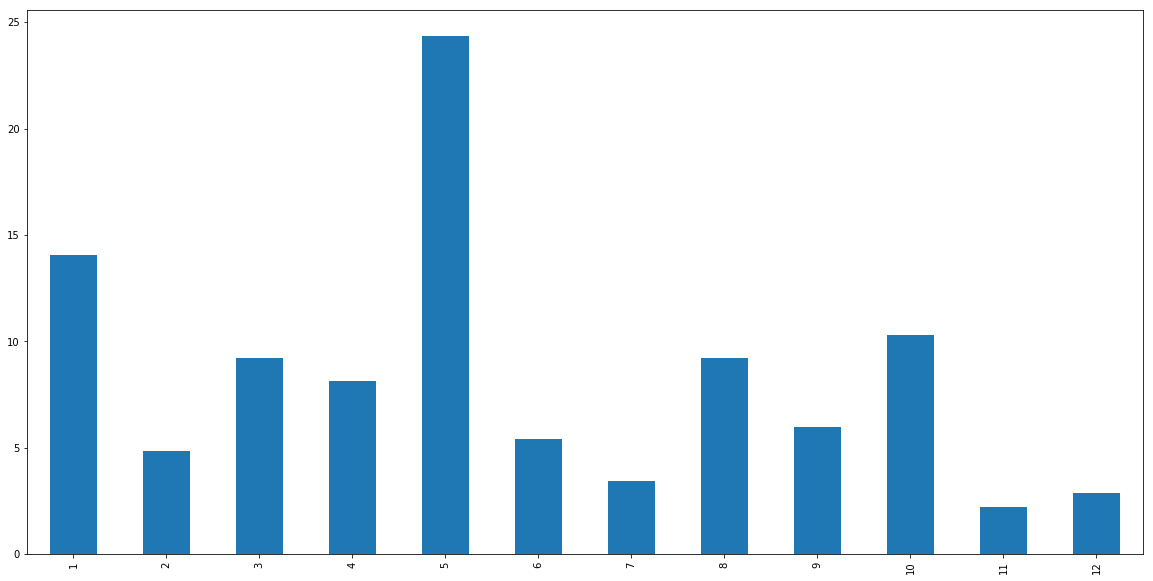

In [137]:
monthly_questions = questions.questions_date_added.dt.month.value_counts(normalize=True).sort_index()*100
monthly_questions.plot(kind='bar', figsize=(20,10))

C:\Users\kvsis\Anaconda3\envs\deepenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


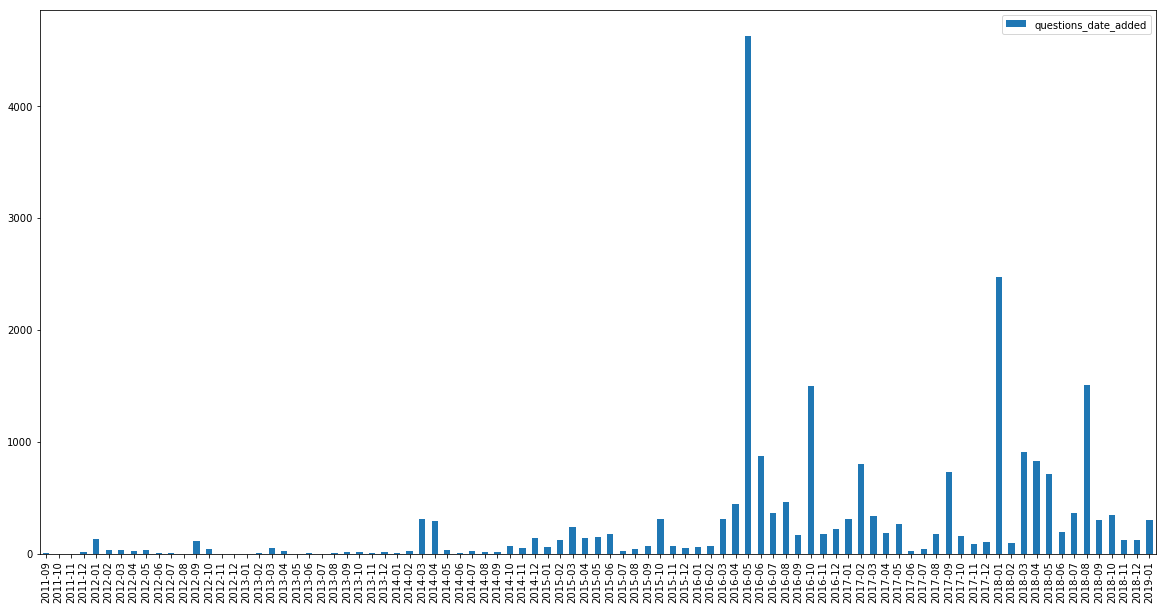

In [139]:
YM_questions = questions.questions_date_added.dt.to_period('M').value_counts().sort_index()
YM_questions.plot(kind='bar', figsize=(20,10))
plt.legend()

In [140]:
# Now, let's look at the same for Professionals
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null object
answers_body           51122 non-null object
dtypes: object(5)
memory usage: 2.0+ MB


In [142]:
answers.answers_id = answers.answers_id.astype('str')
answers.answers_author_id = answers.answers_author_id.astype('str')
answers.answers_question_id = answers.answers_question_id.astype('str')
answers.answers_date_added = pd.to_datetime(answers.answers_date_added)
answers.answers_body = answers.answers_body.astype('str')
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51123 entries, 0 to 51122
Data columns (total 5 columns):
answers_id             51123 non-null object
answers_author_id      51123 non-null object
answers_question_id    51123 non-null object
answers_date_added     51123 non-null datetime64[ns, UTC]
answers_body           51123 non-null object
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 2.0+ MB


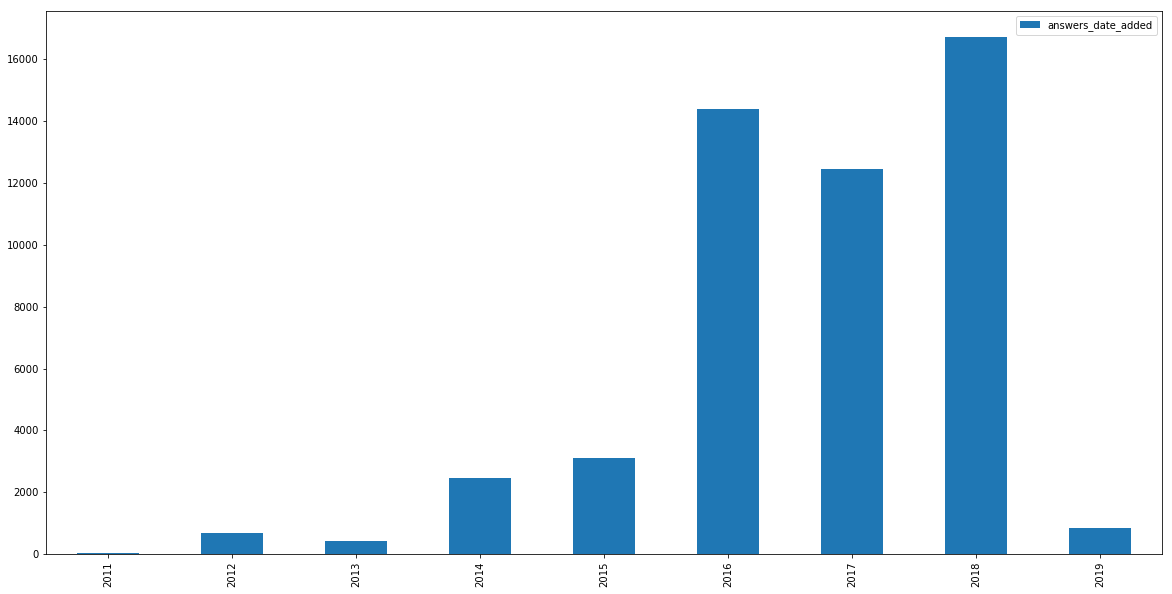

In [168]:
yearly_answers = answers.answers_date_added.dt.year.value_counts().sort_index()
yearly_answers.plot(kind='bar', figsize=(20,10))
plt.legend()

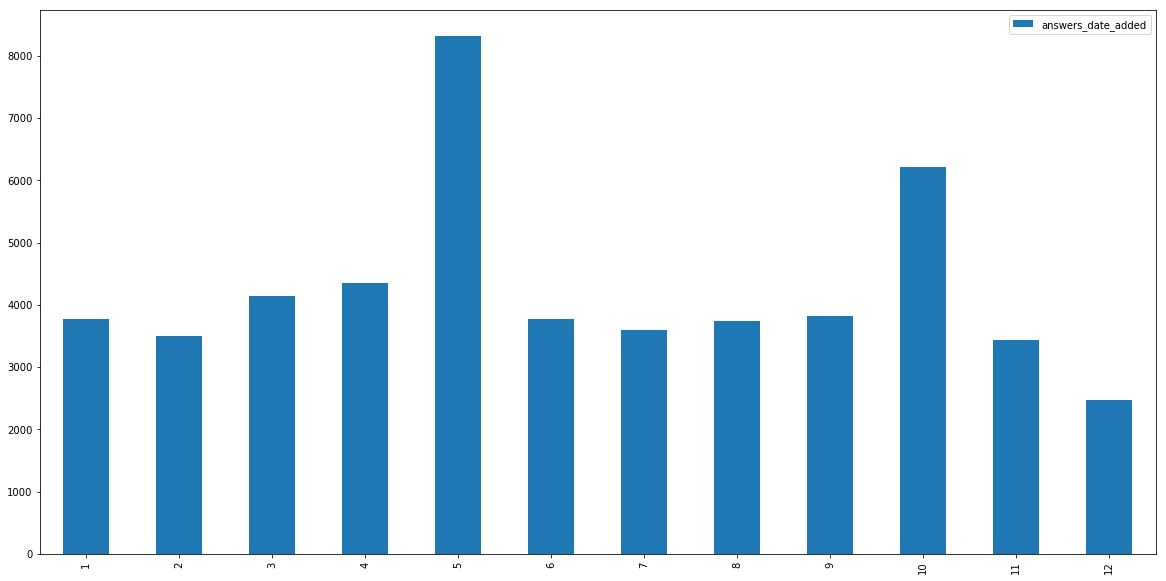

In [146]:
monthly_answers = answers.answers_date_added.dt.month.value_counts().sort_index()
monthly_answers.plot(kind='bar', figsize=(20,10))
plt.legend()

C:\Users\kvsis\Anaconda3\envs\deepenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


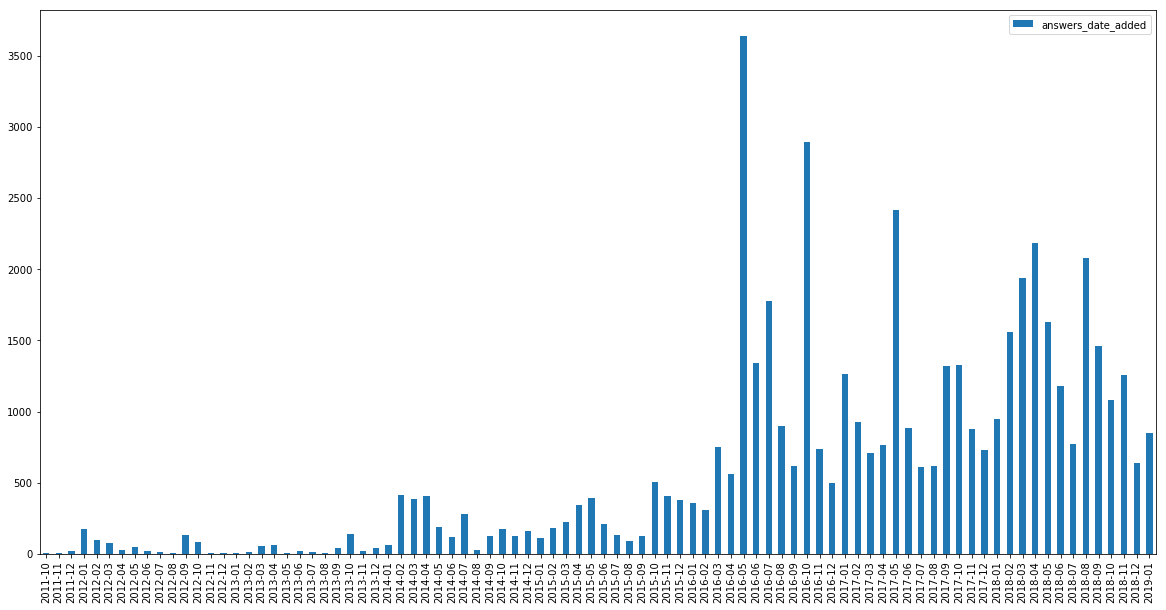

In [147]:
YM_answers = answers.answers_date_added.dt.to_period('M').value_counts().sort_index()
YM_answers.plot(kind='bar', figsize=(20,10))
plt.legend()

### Q2: How many students and professionals participate on the platform?

<strong>yearly_questions:</strong> 2016 had the most questions asked by Students

<strong>yearly_answers:</strong> 2016 and 2018 had the most questions answered by Professionals

<strong>monthly_questions:</strong> May was month in which most questions were asked overall

<strong>monthly_answers:</strong> May was month in which most questions were answered overall

<strong>YM_questions:</strong> May-2016 had the most questions

<strong>YM_answers:</strong> May-2016 had the most answers, but it seems like significant number of answers were given during the months following May-2016.

In [195]:
# Let's compare the questions and answers on a YM basis
YM_QA = pd.DataFrame([questions.questions_date_added.dt.to_period('M').value_counts().sort_index().tolist(), answers.answers_date_added.dt.to_period('M').value_counts().sort_index().tolist()]).T
YM_QA.columns = ['Questions', 'Answers']
YM_QA.index = questions.questions_date_added.dt.to_period('M').value_counts().sort_index().index
YM_QA

C:\Users\kvsis\Anaconda3\envs\deepenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\kvsis\Anaconda3\envs\deepenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\kvsis\Anaconda3\envs\deepenv\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


,Questions,Answers
2011-09,7.0,8.0
2011-10,1.0,5.0
2011-11,3.0,21.0
2011-12,18.0,177.0
2012-01,135.0,99.0
2012-02,35.0,74.0
2012-03,33.0,30.0
2012-04,25.0,50.0
2012-05,31.0,20.0
2012-06,6.0,11.0


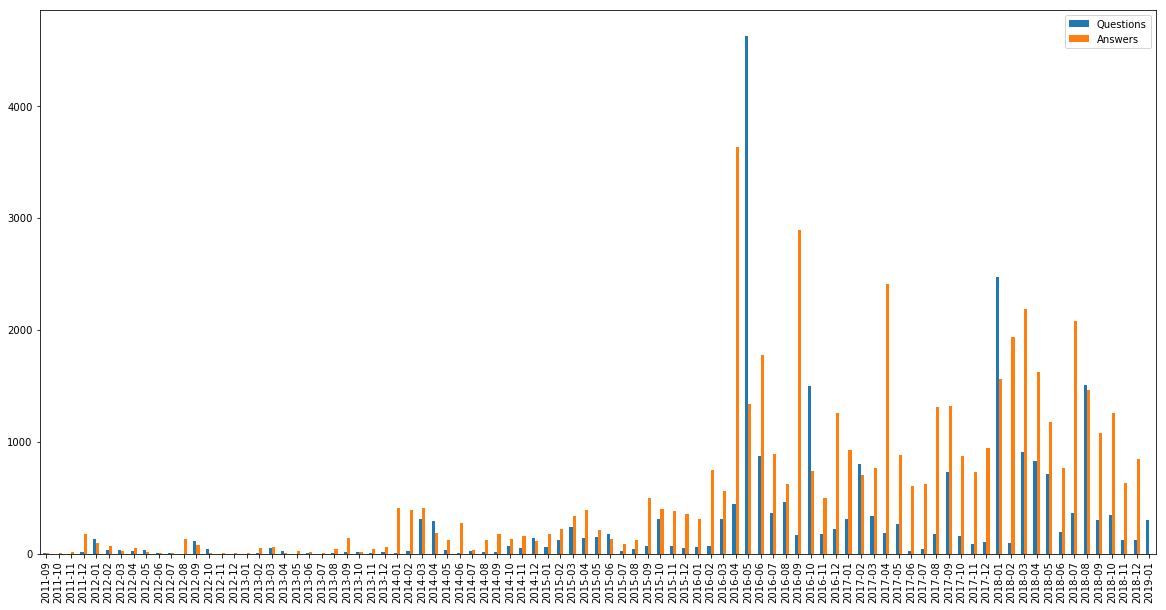

In [215]:
YM_QA.plot(kind='bar', figsize=(20,10))

In [221]:
YM_QA.Questions['2016-05':].sum()-YM_QA.Questions[:'2016-05'].sum()

11344.0

In [222]:
YM_QA.Questions.sum()

23931.0

In [223]:
YM_QA.Answers.sum()

51123.0

In [224]:
YM_QA.Answers['2016-05':].sum()-YM_QA.Answers[:'2016-05'].sum()

25089.0

In [225]:
YM_QA.Answers.sum()-YM_QA.Answers[:'2016-05'].sum()

37436.0

In [226]:
YM_QA.Answers['2016-05':].sum()

38776.0